<div style="display: flex; justify-content: center;">
    <img src="./images/header_image.png">
</div>

<h3>
    <center>
        Міністерство освіти і науки, молоді та спорту<br>
        України Національний технічний університет<br>
        України "Київський політехнічний інститут імені<br>
        Ігоря Сікорського" Фізико - технічний інститут
    </center>
</h3>


<br>
<br>
<br>
<br>

<h3>
    <center>
        Курсова робота<br>
        Аналіз даних за допомогою Python та бібліотеки Pandas<br>
    </center>
</h3>


<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>


<h4 style="text-align: right;">
    Виконала:<br>
    Студентка групи ФІ-21, НН ФТІ<br>
    Максакова Софія Василівна<br>
    Перевірив:<br>
    Павлюк Андрій Дмитрович<br>
</h4>











<h3>
    <center>
        Київ 2023
    </center>
</h3>

<hr>
<br>
<br>
<br>
<div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
    <h2>
        <b>ЗМІСТ</b>
    </h2>
    <ol style="width: 50%;">
        <li>
            <a href="#first_chapter">ЧАСТИНА 1: ЗНАЙОМСТВО З МОЖЛИВОСТЯМИ ANACONDA / IPYTHON NOTEBOOK</a>
        </li>
        <li>
            <a href="#second_chapter">ЧАСТИНА 2: ВИКОНАННЯ ТА ПІДГОТОВКА НАСТУПНОГО РОЗДІЛУ ПОЯСНЮВАЛЬНОЇ ЗАПИСКИ</a>
        </li>
    </ol>
</div>
<br>
<br>
<br>

<hr>
<br>
<div id="first_chapter">
    <h2 style="text-align: center;">
        <b>
            ЧАСТИНА 1<br>
            ЗНАЙОМСТВО З МОЖЛИВОСТЯМИ ANACONDA / IPYTHON NOTEBOOK
        </b>
    <h2>
</div>

<div>
    <span style="font-size: 24px;">
        <b>1.1 Вступ до розділу та визначення мети</b><br>
        <span style="font-size: 18px;">
            Метою моєї курсової роботи є вивчення основних принципів роботи та використання програмних компонентів Anaconda. Інсталяція та налаштування Anaconda разом з IPython Notebook. Одним з етапів виконання курсової роботи є дослідження можливостей IPython Notebook.
        </span>
    </span>
</div>

<div>
    <span style="font-size: 18px;">
        IPython Notebook, знедавна ставший відомим як Jupyter Notebook, є інтерактивним середовищем для програмування, яке дозволяє об'єднувати код, текстові описи, графіки та інші мультимедійні елементи в одному документі. Він широко використовується для розвитку, навчання, дослідження та візуалізації даних.<br><b>Jupyter Notebook складається з таких компонентів:</b>
        <ul>
            <li>
                <b>Кодові клітинки (Code):</b> Ви можете вводити та виконувати код Python (інші мови підтримуються також) у відповідних клітинках. Результати виконання відображаються безпосередньо під кодом.
                <br>
                <br>
                <img src="./images/5.jpg" />
            </li>
            <br>
            <li>
                <b>Текстові клітинки (Markdown):</b> Ви можете додавати текст, пояснення, заголовки, списки та навіть математичні формули за допомогою мови розмітки Markdown.
                <br>
                <br>
                <img src="./images/6.jpg" />
                <img src="./images/7.jpg" />
            </li>
            <br>
            <li>
                <b>Візуалізація даних:</b> Графіки, діаграми, зображення та інші мультимедійні елементи можна відображати безпосередньо в документі.
                <br>
                <br>
                <img src="./images/8.jpg" />
                <img src="./images/9.jpg" />
            </li>
            <br>
            <li>
                <b>Робота з розширеннями:</b> Існують різноманітні розширення, які можна встановлювати для розширення функціональності Jupyter Notebook. Наприклад: Jupyter Widgets, nbextensions, JupyterLab Extensions та інші. Наприклад: Jupyter Widgets, де на офіційному сайті розширення ми можемо знайти також Notebook з прикладами віджетів. 
                <br>
                <br>
                <img src="./images/10.jpg" />
                <img src="./images/11.jpg" />
                <img src="./images/12.jpg" />
                <img src="./images/13.jpg" />
            </li>
        </ul>
    </span>
</div>

<div>
    <span style="font-size: 18px;">
        Робота Jupyter Notebook заключається в запуску веб-сервера на комп'ютері користувача, який створює локальний веб-інтерфейс, доступний через веб-браузер. Коли користувач відкриває файл .ipynb, сервер обробляє цей файл та відображає його зміст у вигляді віджетів, які можна редагувати. Якщо користувач вводить код у клітинці та виконуєте її, сервер виконує цей код та повертає результати, який користувач бачить безпосередньо у ноутбуці.
        Завдяки такому підходу, Jupyter Notebook є потужним інструментом для розробки програм, презентацій, навчання та досліджень, оскільки він дозволяє поєднувати код, текст та графіку в одному документі, що полегшує спільну роботу та розуміння.<br>
        <br>Досліджуючи Jupyter Notebook, я зробила такий висновок – завдяки своїм можливостям, став популярним середовищем для розвитку програм, аналізу даних, візуалізації та навчання. Такі можливості пропонує Jupyter Notebook:
        <ul>
            <li>
                <b>Інтерактивний код:</b> Можливість виконувати код у вигляді окремих клітинок, дозволяючи тестувати фрагменти коду окремо та отримувати результати відразу.
                <br>
                <img src="./images/14.jpg" />
            </li>
            <br>
            <li>
                <b>Розширені можливості підтримки мов:</b> Підтримка не лише Python, але й інших мов програмування (R, Julia, Scala та ін.), що розширює спектр використання середовища.
                <br>
                <b>Notebook для мов програмування Scala та R</b>
                <img src="./images/15.jpg" />
                <img src="./images/16.jpg" />
            </li>
            <br>
            <li>
                <b>Візуалізація даних:</b> Зручні засоби для візуалізації даних безпосередньо у ноутбуці, що дозволяє аналізувати та візуалізувати дані на льоту.
                <br>
                <img src="./images/17.jpg" />
                <img src="./images/18.jpg" />
            </li>
            <br>
            <li>
                <b>Маркування тексту (Markdown):</b> Можливість використовувати розмітку Markdown для створення текстових блоків з форматуванням, вставленням посилань, математичних формул тощо.
            </li>
    </span>
</div>

<hr>
<br>
<div>
    <b>Заголовки (можливі для розмежування документу):</b>
    <br>
    # (Header 1, заголовок)
    <br>
    ## (Header 2, основні заголовки)
    <br>
    ### (Header 3, підзаголовки)
    <br>
    #### (Header 4)
    <br>
    ##### (Header 5)
    <br>
    ###### (Header 6)
    <br>
    <br>
    <b>Альтернативна:</b>
</div>

```html
<h1> Header 1 </h1>
<h2> Header 2 </h2>
<h3> Header 3 </h3>
<h4> Header 4 </h4>
<h5> Header 5 </h5>
<h6> Header 6 </h6>
```

# (Header 1, заголовок)
## (Header 2, основні заголовки)
### (Header 3, підзаголовки)
#### (Header 4)
##### (Header 5)
###### (Header 6)

<hr>
<br>
<div>
    <b>Блок цитат:</b>
    <br>
    > Цитата номер 1
    <br>
    <br>
    <b>Альтернатива:</b>
</div>

```html
<blockquote>Цитата номер 2</blockquote>
```

> Створенний блок цитат, де ми можемо щось зручно описати

<hr>
<br>
<div>
    <b>Жирний та курсивний текст:</b>
    <br>
    <b>Жирний:</b>
    <br>
    ** Це жирний текст
    <br>
    __ І це жирний текст
    <br>
    <br>
    <b>Курсив:</b>
    <br>
    * Це курсивний текст
    <br>
    _ Це також курсивний текст
    <br>
    <br>
        <b>Альтернатива:</b>
</div>

```html
<b>Жирний текст</b>
<i>Курсивний текст</i>
<u>Підкреслений текст</u>
```

<b>Жирний текст</b>
<br>
<i>Курсивний текст</i>
<br>
<u>Підкреслений текст</u>

<hr>
<br>
<div>
    <b>Розділ для опису коду (Code Section / Розділ коду):</b>
    <pre>
    ```Python
    a = 5
    b = 5
    print(a + b)
    ```
    </pre>
    <b>Альтернатива:</b>
</div>

<pre>
    <code>Python
    a = 5
    b = 5
    print(a + b)
    </code>
</pre>

```Python
a = 5
b = 5
print(a + 5)
```

<hr>
<br>
<div>
    <b>Математичні символи (побудова формул за допомогою LaTex-коду):</b>
    <br>
</div>

```Latex
$\sqrt{a+b}$
$\frac{1}{2}$
$a^2 + b^2 = c^2$
```
$\sqrt{a+b}$<br>
$\frac{1}{2}$<br>
$a^2 + b^2 = c^2$

<hr>
<br>
<div>
    <b>Горизонтальна лінія (можемо використовувати, щоб зручно ділити документ):</b>
    <br>
    --- (таким способом можна створити цю лінію)
    <br>
    <br>
    <b>Альтернатива:</b>
</div>

```html
<hr>
```

<hr>
<br>
<div>
    <b>Списки:</b>
    <br>
    <b>Упорядковані списки:</b>
    <br>
    1. Хліб
    <br>
    2. Сало
    <br>
    3. Сіль
    <br>
    4. Цибуля
    <br>
    5. Борщ
    <br>
    <br>
    <b>Альтернатива:</b>
</div>

```html
<ol>
    <li>Хліб</li>
    <li>Сало</li>
    <li>Сіль</li>
    <li>Цибуля</li>
    <li>Борщ</li>
</ol>
```

<ol>
    <li>Хліб</li>
    <li>Сало</li>
    <li>Сіль</li>
    <li>Цибуля</li>
    <li>Борщ</li>
</ol>

<div>
    <b>Невпорядкований список:</b>
    <br>
    - Реп
    <br>
    - Поп
    <br>
    - Джаз
    <br>
    - Класика
    <br>
    <br>
    <b>Альтернатива:</b>
</div>

```html
<ul>
    <li>Реп</li>
    <li>Поп</li>
    <li>Джаз</li>
    <li>Класика</li>
</ul>
```

<ul>
    <li>Реп</li>
    <li>Поп</li>
    <li>Джаз</li>
    <li>Класика</li>
</ul>

<hr>
<br>
<div>
    <b>Внутрішні та зовнішні посилання:</b>
    <br>
    <b>Внутрішні посилання:</b>
    <br>
    [Посилання на розділ](#id_розділу_куди_посилаємось)
    <br>
    <br>
    <b>Альтернатива:</b>
</div>

```html
<a href="#назва_id_розділу">Назва розділу</a>
```

<a href="#first_chapter">ЧАСТИНА 1: ЗНАЙОМСТВО З МОЖЛИВОСТЯМИ ANACONDA / IPYTHON NOTEBOOK</a>

<div>
    <b>Зовнішні посилання:</b>
</div>

```html
<a href="https://www.latex-project.org/help/documentation/">LaTeX Documentation</a>
```

<a href="https://www.latex-project.org/help/documentation/">LaTeX Documentation</a>

<hr>
<br>
<div>
    <b>Таблиці (для оформлення даних):</b>
</div>

```html
<table width="40%">
    <tr>
        <th>Ім'я</th>
        <th>Зарплата</th>
    </tr>
    <tr>
        <td>Олег</td>
        <td>15000 грн</td>
    </tr>
    <tr>
        <td>Степан</td>
        <td>10000 грн</td>
    </tr>
    <tr>
        <td>Валерій</td>
        <td>13500 грн</td>
    </tr>
</table>
```

<div>
    <table width="40%">
        <tr>
            <th>ПІБ</th>
            <th>Зарплата</th>
            <th>Позиція</th>
        </tr>
        <tr>
            <td>Джон Ньман</td>
            <td>3000$</td>
            <td>Senior FullStack Developer</td>
        </tr>
        <tr>
            <td>Майк Келлі</td>
            <td>5000$</td>
            <td>Middle C++ Developer (Embedded)</td>
        </tr>
        <tr>
            <td>Итан Джетт=Беррі</td>
            <td>1500$</td>
            <td>Junior Front-end Developer</td>
        </tr>
        <tr>
            <td>Мія Матісу</td>
            <td>2000$</td>
            <td>Project Manager</td>
        </tr>
    </table>
</div>

<hr>
<br>
<div>
    <b>Зображення:</b>
</div>

```html
<img src="посилання_на_зображення.формат" />
```

<img src="https://lifeimg.pravda.com/images/doc/8/8/88a10a1-gettyimages-936497226--1-.jpg" />

<ul>
    <li>
        <b>Інтеграція з зовнішніми бібліотеками та інструментами:</b> Підтримка інтерактивних бібліотек, таких як matplotlib, Pandas, NumPy, які полегшують обробку даних та візуалізацію.
        <br>
        <img src="./images/19.jpg" />
    </li>
    <br>
    <li>
        <b>Інтерактивність та відлагодження:</b> Можливість відлагодження коду, виконання його по крокам та спостереження за проміжними результатами.
        <br>
        <b>Продивитись всі змінні:</b>
        <br>
        <img src="./images/20.jpg" />
        <br>
        <b>Продивитись зміст змінної:</b>
        <br>
        <img src="./images/21.jpg" />
    </li>
    <br>
    <li>
        <b>Експорт та спільна робота:</b> Можливість експортувати ноутбук у різні формати (HTML, PDF, LaTeX) для подальшого використання та спільної роботи з іншими користувачами.
        <br>
        <b>Експорт в різних форматах (vscode):</b>
        <br>
        <img src="./images/22.jpg">
    </li>
</ul>

<div style="display: flex; flex-direction: column; gap: 5px;">
    <h3>
        <b>Інсталяція:</b>
    </h3>
    <span><b>1.</b> Розпочати треба з візиту офіційного сайту <a href="https://www.anaconda.com/download">Anaconda</a> та завантаженням файла, який ми запустимо для встановлення Anaconda. <br>Для цього нам необхідно перейти за посиланням і натиснути на кнопку Download, на початковому екрані сайту.</span>
    <img src="./images/0.jpg"><br>
    <span><b>2.</b> Після чого почнеться завантаження, а сайт змінить свій стиль. Та, Після того, як завантажити Anaconda необхідно відкрити Anaconda Navigator.</span>
    <img src="./images/1.jpg"><br>
    <span><b>3.</b> Знаходимо на панелі Jupyter Notebook і натискаємо Install. Після чого почнеться завантаження. Як пакети завантажаться, замість кнопки Install буде кнопка Launch.</span>
    <img src="./images/2.jpg"><br>
    <span><b>4.</b> Шукаємо наш Jupyter Notebook і, натиснувши кнопку Launch, працюємо.</span>
    <img src="./images/3.jpg"><br>
    <span><b>5.</b> Створюємо новий нотбук і починаємо в ньому працювати.</span>
    <img src="./images/4.jpg">
</div>

<div id="second_chapter">
    <h2 style="text-align: center;">
        <b>
            ЧАСТИНА 2<br>
            ВИКОНАННЯ ТА ПІДГОТОВКА НАСТУПНОГО РОЗДІЛУ <br>ПОЯСНЮВАЛЬНОЇ ЗАПИСКИ
        </b>
    <h2>
</div>

<div>
    <span style="font-size: 24px;">
        <b>2.1 Огляд та виконання поставлених завдань</b><br>
        <span style="font-size: 18px;">
            Проаналізувавши завдання до курсового проєкту, я визначила для себе таку мету – отримання досвіду у використанні основних засобів аналізу та візуалізації даних у середовище IPython Notebook на модельних наборах даних. Отримання практичних навичок у створенні комплексної програми для аналізу наданих даних та практичний досвід у створенні власних алгоритмів і методів аналізу.
        </span>
    </span>
</div>

<div>
    <h3>
        <b><i>Fruits and Vegetables Prices Dataset</i></b>
    </h3>
    <span>
        Набір даних про ціни на фрукти та овочі – роздрібні та фермерські ціни на різні продукти в різних містах (1999–2019) <br><a href="https://www.kaggle.com/datasets/everydaycodings/produce-prices-dataset">Fruits and Vegetables Prices Dataset</a>
    </span>
    <h4>
        <b>Про набір даних:</b>
    </h4>
    <span>
        Цей набір даних детально розглядає роздрібні та фермерські ціни на різні свіжі продукти в різних містах. Дані охоплюють період з 1999 по 2019 рік і включають інформацію про назви продуктів, дати, ціни на ферми та роздрібні ціни у великих містах, таких як Атланта, Чикаго, Лос-Анджелес і Нью-Йорк.<br>Поля, які містить цей набір даних:
    </span>
    <ul>
        <li><b>Product Name:</b> назва продукту.</li>
        <li><b>Date:</b> інформації про дати та про ціни.</li>
        <li><b>Farm Price:</b> ціна, за якою продукція продається на фермі.</li>
        <li><b>Retail Prices:</b> роздрібні ціни у великих містах (Атланта, Чикаго, Лос-Анджелес, Нью-Йорк).</li>
        <li><b>Average Spread:</b> відсоток, що вказує на середню націнку між сільськогосподарською та роздрібною цінами.</li>
    </ul>
</div>

In [15]:
# Імпортуємо такі бібліотеки:
# - pandas (під псевдонімом pd): Використовується для обробки і аналізу даних, зазвичай в табличній формі.
# - numpy (під псевдонімом np): Використовується для роботи з числовими масивами та матрицями у Python.
# - seaborn (під псевдонімом sns): Це бібліотека для статистичної візуалізації даних, яка працює поверх бібліотеки Matplotlib.
# - matplotlib.pyplot (під псевдонімом plt): Бібліотека для створення графіків та візуалізації даних у Python.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<hr>
<br>
<div>
    <h1> 
        <b>Завдання №1</b>
    </h1>
    <span>
        <b>В завданні №1 нам треба було зробити наступне:</b> <br><br>Встановити IPython Notebook разом з Anaconda та створити новий IPython Notebook 3/2.
    </span>
    <br>
    <br>
    <span>
        <b>Виконання:</b> мною був створений новий IPython Notebook, який ви можете бачити зараз.<br> В цьому нотбуці описана повністю моя курсова робота: вступ, перша частина, друга частина і хід виконання завдань.
    </span>
</div>

<div>
    <h1> 
        <b>Завдання №2</b>
    </h1>
    <span>
        <b>В завданні №2 нам треба було зробити наступне:</b><br><br>Проаналізувати набір даних на наявність пропущених значень та NaN, та, у випадку наявності таких значень їх потрібно заповнити значеннями за допомогою fillna, використовуючи метод bfill (заміна на наступне валідне значення після Nan) або ffil (заміна на попереднє валідне значення після Nan)
    </span>
    <br>
    <br>
    <span>
        <b>Виконання:</b>
    </span>
</div>

In [16]:
# Створюємо зміну, яка буде носити шлях до нашого набору даних
filepath = 'csv_data/ProductPriceIndex.csv'

dataframe = pd.read_csv(filepath, index_col='productname')
dataframe = dataframe.map(lambda x: x.strip("%$"))

# За допомогою функції output_data виводимо перші 15 рядків
print(f"Набір даних:\n{dataframe.head(15)}")

Набір даних:
                          date farmprice atlantaretail chicagoretail  \
productname                                                            
Strawberries        2019-05-19      1.16          2.23          1.70   
Romaine Lettuce     2019-05-19      0.35          1.72          2.00   
Red Leaf Lettuce    2019-05-19      0.32          1.84          1.84   
Potatoes            2019-05-19      1.50          5.32          5.14   
Oranges             2019-05-19      0.41          1.42          1.45   
Iceberg Lettuce     2019-05-19      0.35          1.39          1.46   
Green Leaf Lettuce  2019-05-19      0.31          1.72          1.70   
Celery              2019-05-19      2.83          1.89          2.36   
Cauliflower         2019-05-19      1.22          3.24          4.35   
Carrots             2019-05-19      0.24          0.95          0.95   
Cantaloupe          2019-05-19      1.25          2.34          2.87   
Broccoli Crowns     2019-05-19      0.73          1

In [17]:
if 'averagespread' in dataframe.columns:
    dataframe['averagespread'] = dataframe['averagespread'].replace(',', '', regex=True)

    dataframe.replace('', np.nan, inplace=True)

    cols_to_convert = dataframe.columns[1:7]

    dataframe[cols_to_convert] = dataframe[cols_to_convert].astype(float)
    dataframe.loc[:, 'productname'] = dataframe.index

status = dataframe.isnull().sum()
print(f"До аналізу даних і заміни усіх NaN з допомогою fillna() / bfill(): \n{status}")

До аналізу даних і заміни усіх NaN з допомогою fillna() / bfill(): 
date                0
farmprice           1
atlantaretail       1
chicagoretail       0
losangelesretail    0
newyorkretail       8
averagespread       0
productname         0
dtype: int64


In [18]:
if dataframe.isnull().values.any():
    dataframe.fillna(0.0, inplace=True)

status = dataframe.isnull().sum()
print(f"\n\nПісля аналізу даних і заміни усіх NaN з допомогою fillna(): \n{status}")



Після аналізу даних і заміни усіх NaN з допомогою fillna(): 
date                0
farmprice           0
atlantaretail       0
chicagoretail       0
losangelesretail    0
newyorkretail       0
averagespread       0
productname         0
dtype: int64


<div>
    <h1> 
        <b>Завдання №3</b>
    </h1>
    <span>
        <b>В завданні №3 нам треба було зробити наступне:</b><br><br>Відкрити набір даних засобами pandas.
    </span>
    <br>
    <br>
    <span>
        <b>Виконання:</b>
    </span>
</div>

In [19]:
dataframe = pd.read_csv(filepath, index_col='productname')
dataframe = dataframe.map(lambda x: x.strip("%$"))

if 'averagespread' in dataframe.columns:
    dataframe['averagespread'] = dataframe['averagespread'].replace(',', '', regex=True)

    dataframe.replace('', np.nan, inplace=True)

    cols_to_convert = dataframe.columns[1:7]

    dataframe[cols_to_convert] = dataframe[cols_to_convert].astype(float)
    dataframe.loc[:, 'productname'] = dataframe.index

if dataframe.isnull().values.any():
    dataframe.fillna(0.0, inplace=True)

print(f"Набір даних:\n{dataframe.head(15)}")

Набір даних:
                          date  farmprice  atlantaretail  chicagoretail  \
productname                                                               
Strawberries        2019-05-19       1.16           2.23           1.70   
Romaine Lettuce     2019-05-19       0.35           1.72           2.00   
Red Leaf Lettuce    2019-05-19       0.32           1.84           1.84   
Potatoes            2019-05-19       1.50           5.32           5.14   
Oranges             2019-05-19       0.41           1.42           1.45   
Iceberg Lettuce     2019-05-19       0.35           1.39           1.46   
Green Leaf Lettuce  2019-05-19       0.31           1.72           1.70   
Celery              2019-05-19       2.83           1.89           2.36   
Cauliflower         2019-05-19       1.22           3.24           4.35   
Carrots             2019-05-19       0.24           0.95           0.95   
Cantaloupe          2019-05-19       1.25           2.34           2.87   
Broccoli Cro

<div>
    <h1> 
        <b>Завдання №4</b>
    </h1>
    <span>
        <b>В завданні №4 нам треба було зробити наступне:</b><br><br>Представити набір даних у матричному вигляді.<br> Відобразити 10 елементів для 4-ох ознак Виділити зеленим кольором максимальні елементи в таблиці, а червоним мінімальні для цих 10-ти елементів.
    </span>
    <br>
    <br>
    <div>
        <span><b>Приклад візуалізації:</b></span>
        <br>
        <br>
        <table width="60%" style="text-align: center;">
            <tr>
                <th style="color: grey; font-style: italic; text-align: right;">Model: </th>
                <th colspan="2" style="background: #0c0a6e; color: white;">Decision Tree</th>
                <th colspan="2" style="background: #0c0a6e; color: white;">Regression</th>
            </tr>
            <tr style="text-align: center;">
                <td style="color: grey; font-style: italic; text-align: right;">Predicted:</td>
                <td style="background: #0c0a6e; color: white;">Tomour</td>
                <td style="background: #0c0a6e; color: white;">Non Tomour</td>
                <td style="background: #0c0a6e; color: white;">Tomour</td>
                <td style="background: #0c0a6e; color: white;">Non Tomour</td>
            </tr>
            <tr>
                <td style="color: grey; font-style: italic; text-align: right;">Actual Label:</td>
                <td style="background: #0c0a6e; color: white;"> </td>
                <td style="background: #0c0a6e; color: white;"> </td>
                <td style="background: #0c0a6e; color: white;"> </td>
                <td style="background: #0c0a6e; color: white;"> </td>
            </tr>
            <tr>
                <td style="background: #0c0a6e; color: white; text-align: right;">Tomour</td>
                <td style="background: #9dff96; color: black;">38</td>
                <td style="background: #ffa6a6; color: black;">2</td>
                <td style="background: #9dff96; color: black;">18</td>
                <td style="background: #ffa6a6; color: black;">22</td>
            </tr>
            <tr>
                <td style="background: #0c0a6e; color: white; text-align: right;">Non Tomour</td>
                <td style="background: #ffa6a6; color: black;">19</td>
                <td style="background: #9dff96; color: black;">439</td>
                <td style="background: #ffa6a6; color: black;">6</td>
                <td style="background: #9dff96; color: black;">452</td>
            </tr>
        </table>
    </div>
    <br>
    <br>
    <span>
        <b>Виконання:</b>
    </span>
</div>

In [20]:
select_df = dataframe.iloc[:10, 2:6]

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

def highlight_min(s):  
    is_min = s == s.min()
    return ['background-color: red' if v else '' for v in is_min]

styled_df = select_df.style.apply(highlight_max).apply(highlight_min)

styled_df.format({'atlantaretail': '{:.2f}', 'chicagoretail': '{:.2f}', 'losangelesretail': '{:.2f}',  'newyorkretail': '{:.2f}'})

styled_df

,atlantaretail,chicagoretail,losangelesretail,newyorkretail
productname,,,,
Strawberries,2.23,1.70,1.99,2.54
Romaine Lettuce,1.72,2.00,1.69,1.99
Red Leaf Lettuce,1.84,1.84,1.69,1.89
Potatoes,5.32,5.14,3.99,6.22
Oranges,1.42,1.45,1.34,2.05
Iceberg Lettuce,1.39,1.46,1.69,1.56
Green Leaf Lettuce,1.72,1.70,1.69,1.71
Celery,1.89,2.36,2.52,2.49
Cauliflower,3.24,4.35,4.03,2.97


<div>
    <span>
        <b>Додатково:</b><br><br>Вирахувати математичне сподівання та дисперсію для набору даних. Стандартизувати дані.
    </span>
</div>

$X_{\text{std}}=\frac{X-\mu}{\sigma}$
<br>
<br>
$\mu=\Sigma$ $\qquad $ $p_{\text{i}}X_{\text{i}},~{\text{де}} ~ p_{\text{i}}-{\text{ймовірність появи елементу}} X_{\text{i}}$
<br>
<br>
$\sigma=\sqrt{\frac{\Sigma\quad(X_{\text{i}} - \underline{X})}{n - 1}}$

In [21]:
selected_data = dataframe.iloc[:, 2:6]

mean_data = selected_data.mean()
std_data = selected_data.std()
variance_data = np.var(selected_data)
standardized_data = (selected_data - mean_data) / std_data

print(f"Математичне сподівання для вибраних даних:\n{mean_data}")
print(f"\nДисперсія для вибраних даних:\n{variance_data}")
print(f"\nСтандартне відхилення для вибраних даних:\n{std_data}")
print(f"\nСтандартизовані вибрані дані:\n{standardized_data.iloc[:30]}")

Математичне сподівання для вибраних даних:
atlantaretail       1.755906
chicagoretail       1.716432
losangelesretail    1.721203
newyorkretail       1.972432
dtype: float64

Дисперсія для вибраних даних:
atlantaretail       0.919093
chicagoretail       0.940328
losangelesretail    0.855878
newyorkretail       1.262465
dtype: float64

Стандартне відхилення для вибраних даних:
atlantaretail       0.958724
chicagoretail       0.969736
losangelesretail    0.925166
newyorkretail       1.123630
dtype: float64

Стандартизовані вибрані дані:
                    atlantaretail  chicagoretail  losangelesretail  \
productname                                                          
Strawberries             0.494506      -0.016945          0.290540   
Romaine Lettuce         -0.037452       0.292418         -0.033726   
Red Leaf Lettuce         0.087715       0.127424         -0.033726   
Potatoes                 3.717540       3.530413          2.452313   
Oranges                 -0.350368      

e:\Conda\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


<div>
    <h1> 
        <b>Завдання №5</b>
    </h1>
    <span>
        <b>В завданні №5 нам треба було зробити наступне:</b><br><br>Провести візуалізацію даних. Для цього необхідно побудувати такі типи графіків: Line Plot,
Bare Chart, Histogram, Heatmap.
    </span>
    <br>
    <br>
    <span>
        <b>Виконання:</b>
    </span>
</div>

e:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


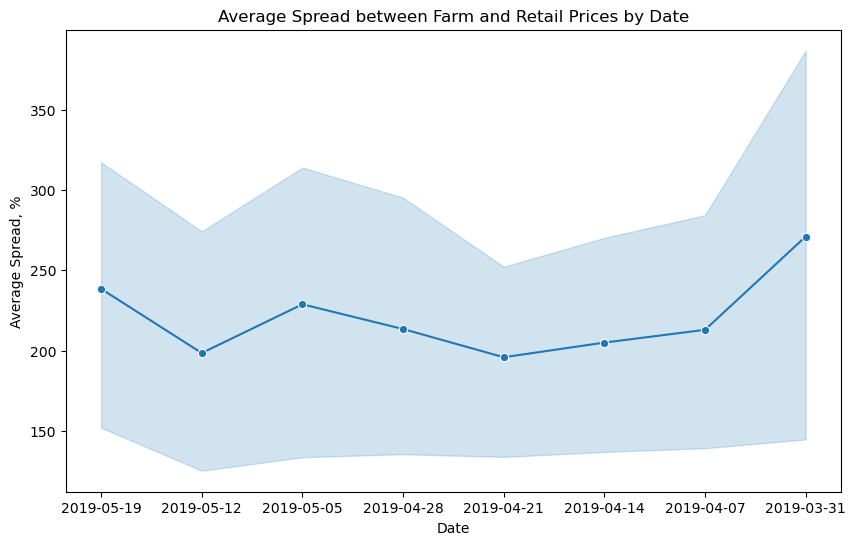

In [22]:
plt.figure(figsize=(10, 6))
data = dataframe.iloc[:100, :]

sns.lineplot(data=data, x="date", y="averagespread", marker="o")

plt.xlabel('Date')
plt.ylabel('Average Spread, %')
plt.title('Average Spread between Farm and Retail Prices by Date')
plt.show()

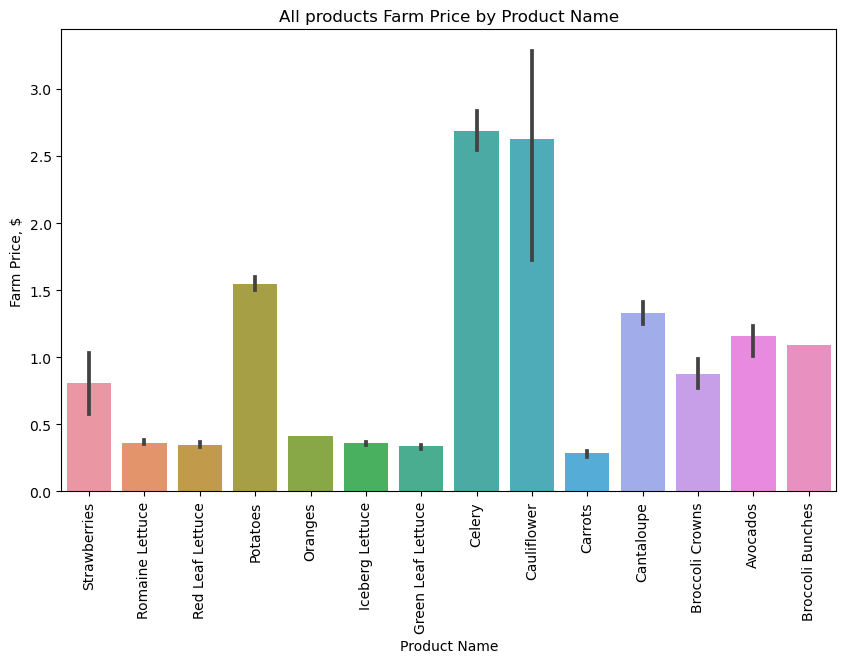

In [23]:
plt.figure(figsize=(10, 6))
data = dataframe.iloc[:50, :]

sns.barplot(data=data, x='productname', y='farmprice')

plt.xlabel('Product Name')
plt.ylabel('Farm Price, $')
plt.xticks(rotation=90)
plt.title('All products Farm Price by Product Name')
plt.show()

e:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


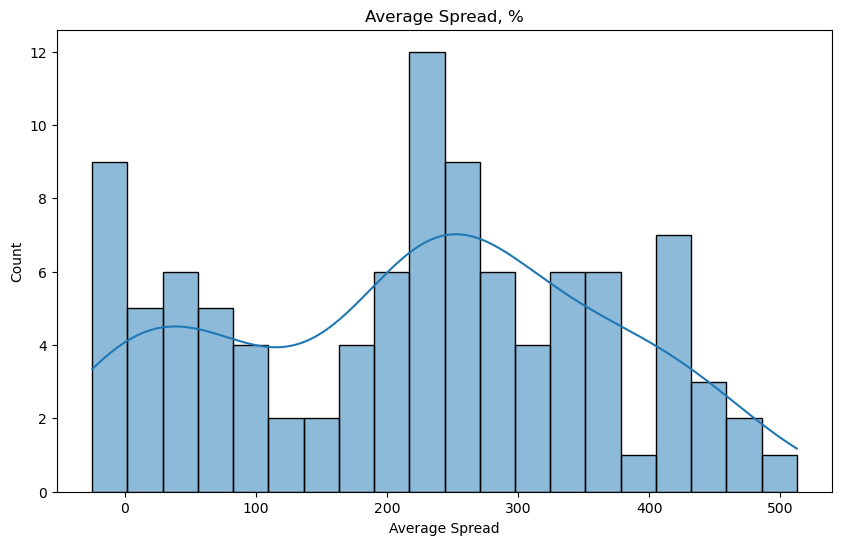

In [24]:
plt.figure(figsize=(10, 6))
data = dataframe.iloc[:100, :]
sns.histplot(data=data, x='averagespread', bins=20, kde=True)

plt.xlabel('Average Spread')
plt.title('Average Spread, %')
plt.show()

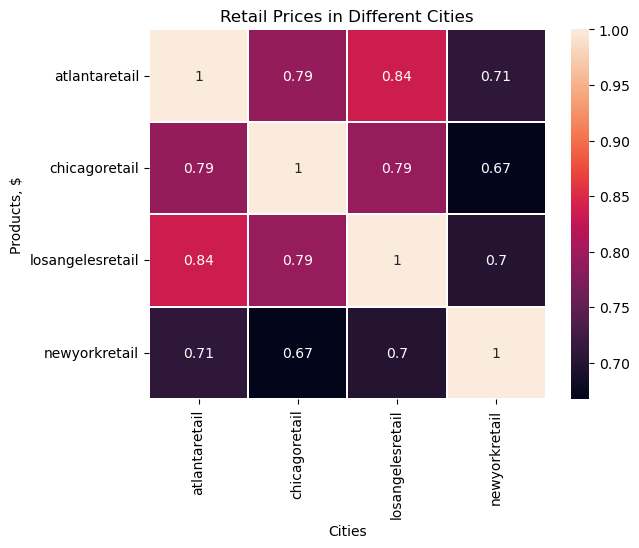

In [25]:
df = dataframe.iloc[:, 2:6].corr()
sns.heatmap(data=df, cmap='rocket', annot=True, linewidths=.2)
plt.xlabel('Cities')
plt.ylabel('Products, $')
plt.xticks(rotation=90)
plt.title('Retail Prices in Different Cities')
plt.show()

<div>
    <h1> 
        <b>Завдання №6</b>
    </h1>
    <span>
        <b>В завданні №6 нам треба було зробити наступне:</b><br><br>Збудувати лінійний графік з 4-ма лініями, які взяті з ознак та додати annotate для середнього значення кожної лінії. При цьому для візуалізації багатовимірних даних з кількістю ознак більше двох обов’язково необхідно за допомогою subplot збудувати 9 графіків за допомогою комбінування різних ознак.
    </span>
    <br>
    <br>
    <span>
        <b>Виконання:</b>
    </span>
</div>

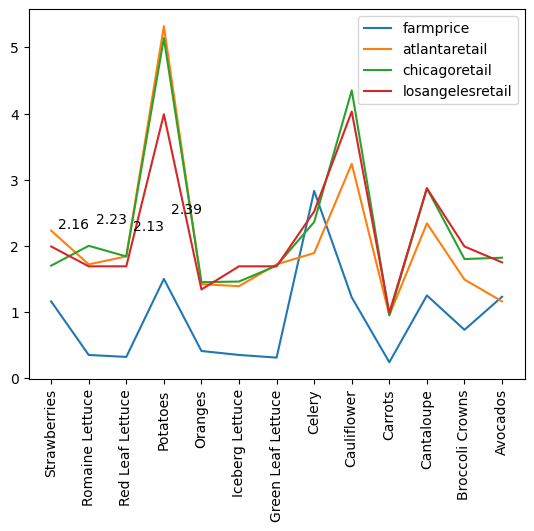

In [26]:
fig, ax = plt.subplots()
data = dataframe.head(300)

for column in ['farmprice','atlantaretail','chicagoretail','losangelesretail']:
    filtered_data = data[data['date'] == '2019-05-19']
    ax.plot(filtered_data['productname'], filtered_data[column], label=column)

ax.legend()

y_values = data[data.columns[2:7]].mean().values
x_values = data['productname'].unique()

for x,y in zip(x_values, y_values):  
    ax.annotate(f"{y:.2f}", xy=(x,y), xytext=(5, 5), textcoords='offset points') 
        
ax.autoscale()
plt.xticks(rotation=90)
plt.show()

e:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


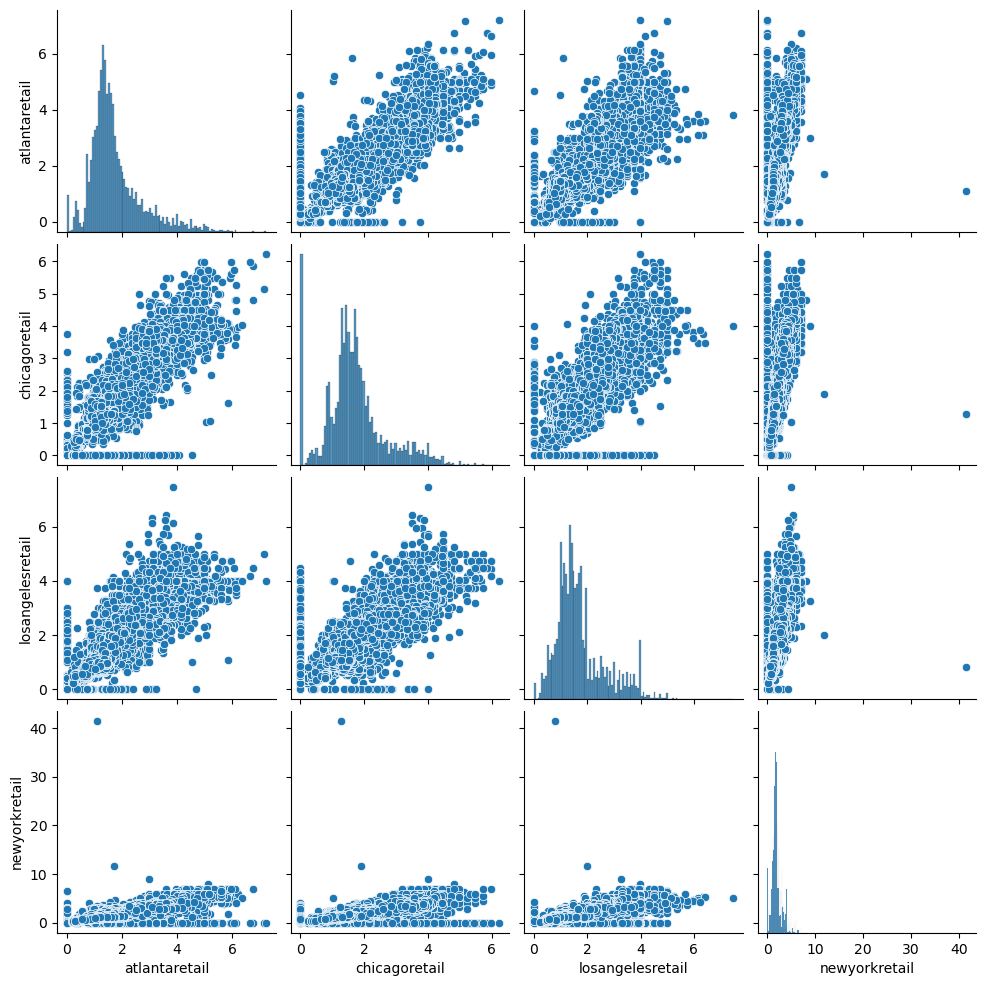

In [27]:
# Показує кореляції між різними параметрами.
data = dataframe.iloc[:, 2:6]
sns.pairplot(data=data, diag_kind="hist")
plt.show()

<div>
    <h1> 
        <b>Завдання №7</b>
    </h1>
    <span>
        <b>В завданні №7 нам треба було зробити наступне:</b><br><br>Вирахувати коефіцієнт пірсона для кожної пари ознак. Взяти третю ознаку за вісь X та збудувати relplot для двох ознак, що мають найбільшу кореляцію за допомогою бібліотеки seaborn.
    </span>
    <br>
    <br>
    <span>
        <b>Виконання:</b>
    </span>
</div>

Ознаки з найбільшою кореляцією: ['atlantaretail', 'losangelesretail']
                  atlantaretail  chicagoretail  losangelesretail  \
atlantaretail          1.000000       0.790826          0.835031   
chicagoretail          0.790826       1.000000          0.792742   
losangelesretail       0.835031       0.792742          1.000000   
newyorkretail          0.707731       0.667175          0.699184   

                  newyorkretail  
atlantaretail          0.707731  
chicagoretail          0.667175  
losangelesretail       0.699184  
newyorkretail          1.000000  


e:\Conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
e:\Conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


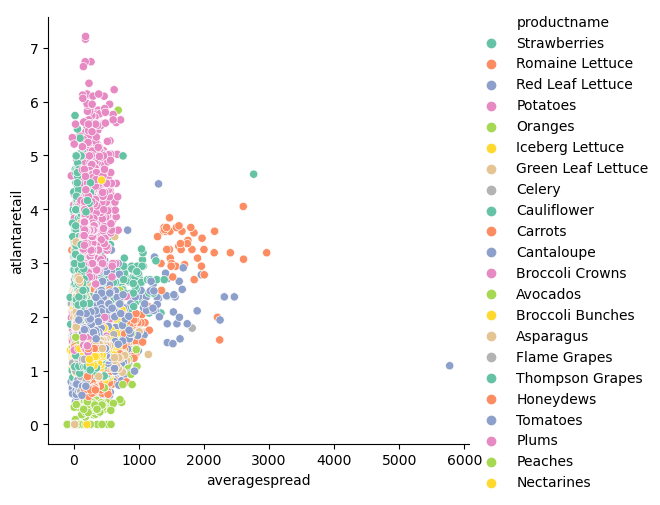

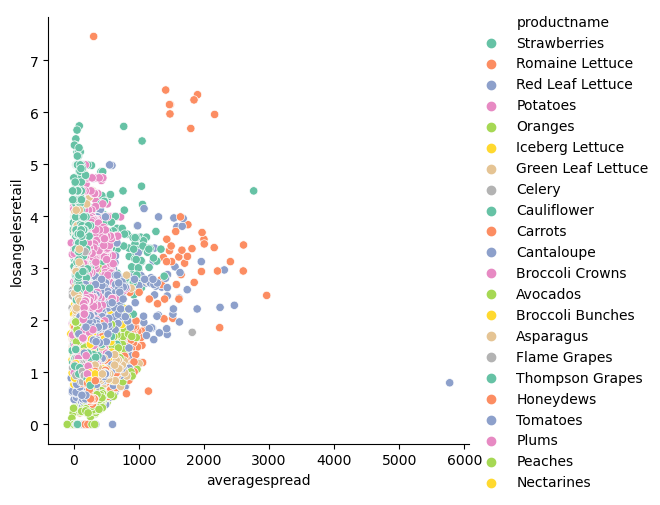

In [28]:
df = dataframe
corr_matrix = df.iloc[:, 2:6].corr()

max_corr = abs(corr_matrix.values[np.triu_indices_from(corr_matrix, 1)]).max()
idx = np.where(abs(corr_matrix) == max_corr)
max_corr_features = [corr_matrix.columns[idx[0][0]], corr_matrix.columns[idx[1][0]]]
print('Ознаки з найбільшою кореляцією:', max_corr_features)
print(corr_matrix)

sns.relplot(x="averagespread", y=max_corr_features[0], data=df, hue="productname", palette="Set2", legend=True)
sns.relplot(x="averagespread", y=max_corr_features[1], data=df, hue="productname", palette="Set2", legend=True)
plt.show()

<div>
    <h1> 
        <b>Завдання №8</b>
    </h1>
    <span>
        <b>В завданні №8 нам треба було зробити наступне:</b><br><br>У початковому наборі даних, перед заміною значень Nan на валідні значення за допомогою fillna, необхідно видалити всі колонки із значеннями Nan.
    </span>
    <br>
    <br>
    <span>
        <b>Виконання:</b>
    </span>
</div>

In [29]:
print("Початок: ", dataframe.isnull().sum())
dataframe.dropna()
print("\nПісля: ",dataframe.isnull().sum())

Початок:  date                0
farmprice           0
atlantaretail       0
chicagoretail       0
losangelesretail    0
newyorkretail       0
averagespread       0
productname         0
dtype: int64

Після:  date                0
farmprice           0
atlantaretail       0
chicagoretail       0
losangelesretail    0
newyorkretail       0
averagespread       0
productname         0
dtype: int64


<div>
    <h1> 
        <b>Завдання №9</b>
    </h1>
    <span>
        <b>В завданні №9 нам треба було зробити наступне: Видалити випадкові значення з ознак що мають найбільшу кореляцію у кількості 10%
для обох. Підрахувати кореляцію. Збудувати multipple scatterplot за допомогою FacetGrid
для цих оновлених ознак використовуючи бібліотеку seaborn взявши третю ознаку за вісь x.</b>
    </span>
    <br>
    <br>
    <span>
        <b>Виконання:</b>
    </span>
</div>

                        date  farmprice  atlantaretail  chicagoretail  \
productname                                                             
Strawberries      2007-08-05       1.04           2.69           3.25   
Iceberg Lettuce   2011-07-10       0.28           1.41           1.57   
Red Leaf Lettuce  2009-09-06       0.30           1.27           1.84   
Carrots           2010-10-17       0.28           0.60           1.16   
Honeydews         2016-06-26       1.19           3.99           2.74   
...                      ...        ...            ...            ...   
Nectarines        2011-09-04       0.36           1.84           1.29   
Avocados          2001-04-22       0.60           0.77           1.37   
Potatoes          2002-12-29       0.85           4.48           3.74   
Iceberg Lettuce   2007-05-06       0.25           1.41           1.42   
Strawberries      2010-01-17       2.50           3.61           3.37   

                  losangelesretail  newyorkretail 

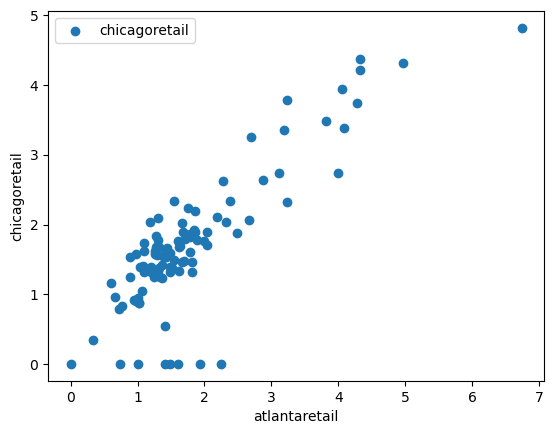

In [30]:
df_with_10 = df.drop(['productname'], axis=1)
df_without_10 = df_with_10.iloc[np.random.choice(df_with_10.shape[0], round(df_with_10.shape[0] * 0.9))]
print(df_without_10)

numeric_columns = df_with_10.select_dtypes(include=['float64']).columns
df_with_10_numeric = df_with_10[numeric_columns]
df_without_10_numeric = df_without_10[numeric_columns]
print(df_without_10_numeric)

plt.scatter("atlantaretail", "chicagoretail", data=df_without_10_numeric.iloc[:100, :])
plt.xlabel("atlantaretail")
plt.ylabel("chicagoretail")
plt.legend()
plt.show()

<hr>
<br>
<div>
    <h2 style="text-align: center;">
        <b>ВИСНОВКИ</b>
    <h2>
    <span style="font-size: 18px;">
        Результатом моєї роботи є програма, яка виконує функціонал аналізу набору даних про різницю цін та ціни на продукти певного господарства, та міста. При виконанні цієї роботи я навчилась користуватись Anaconda Navigator, а також Jupyter Notebook.
        <br><br>Також я отримала значний практичний і теоретичний досвід у використанні основних засобів аналізу та візуалізації даних у середовище IPython Notebook на модельних наборах даних. Пропрацювала з такими модулями, як: seaborn, pandas, numpy та matplotlib та отримала практичні навички у створенні комплексної програми для аналізу наданих даних. Практиковалась у створенні своїх рішень та алгоритмів.
        <br><br>Результат та вихідний код прикріплюю до цього GitHub: <a href="https://github.com/Soff4/course-work-products">Soff4</a>. 
    </span>
</div>

<hr>
<br>
<div>
    <h2 style="text-align: center;"> 
        <b>ДЖЕРЕЛА ВИКОРИСТАННОЇ ЛІТЕРАТУРИ</b><br>
    </h2>
    <ol style="font-size: 24px;">
        <li>Офіційна документація Pandas: <a href="https://pandas.pydata.org/docs/getting_started/index.html">Офіційна документація Pandas</a></li>
        <li>Офіційна документація Seaborn: <a href="https://seaborn.pydata.org/">Офіційна документація Seaborn</a></li>
        <li>Офіційна документація Numpy: <a href="https://numpy.org/">Офіційна документація Numpy</a></li>
        <li>Офіційна документація Anaconda: <a href="https://docs.anaconda.com/index.html">Офіційна документація Anaconda</a></li>
        <li>Офіційна документація Jupyter Notebook: <a href="https://docs.jupyter.org/en/latest/">Офіційна документація Jupyter Notebook</a></li>
    </ol>
</div>